In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
DNA_SIZE = 10 # DNA长度
POP_SIZE = 100 # 种群包含个体数 
CROSS_RATE = 0.8 # dna之间有80%的概率进行交叉配对 
MUTATION_RATE = 0.003 # 在遍历一条dna时，每个基因的变异概率
X_BOUND = [0,5] # x轴从0至5取值

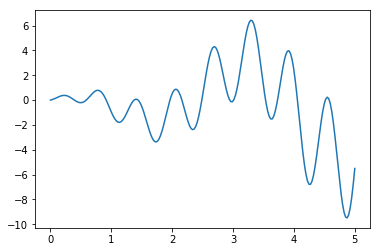

In [3]:
def F(x):
    return np.sin(10*x)*x + np.cos(2*x)*x

x = np.linspace(*X_BOUND, 200)
plt.plot(x, F(x))
plt.show()

pop: population 种群

初始化种群
关于numpy axis的解释：

![](./figs/np_axis.jpg)

In [4]:
def get_fitness(pred):
    """适应度，我们想选择图像上尽可能高的点，所以点越高，适应度越强
    pred 这里就是我们预测的高度"""
    
    return pred + 1e-3 - np.min(pred)


def crossover(parent, pop):
    """交叉"""
    if np.random.rand()<CROSS_RATE:
        # 如果发生杂交
        idx = np.random.randint(0, POP_SIZE, size=1)
        # 和种群中第idx个个体杂交
        cross_points = np.random.randint(0, 2, size=DNA_SIZE).astype(np.bool)
        parent[cross_points] = pop[idx, cross_points]
    return parent 
def mutate(child):
    """变异"""
    for point in range(DNA_SIZE):
        if np.random.rand() < MUTATION_RATE:
            child[point] = 1 - child[point]
    return child

def select(pop, fitness):
    """适者生存"""
    idx = np.random.choice(np.arange(POP_SIZE), size=POP_SIZE,
                          replace=True, p = fitness/fitness.sum())
    # 当replace为True时，元素可能重复。
    return pop[idx]


def translateDNA(pop):
    """将种群翻译成dna"""
    # 将二进制转换成十进制
    res = pop.dot(2**np.arange(DNA_SIZE)[::-1])
    # 将结果变成 [0,1]内的数字
    res = res / float(2**DNA_SIZE - 1)
    # 将结果贬称 [0,5]内的数字
    res = res*X_BOUND[1]
    return res

In [5]:
pop = np.random.randint(2, size=(POP_SIZE, DNA_SIZE))
print(pop[:2])
print(pop.shape)

[[1 0 0 1 1 0 0 1 0 0]
 [0 0 1 1 1 1 0 0 1 0]]
(100, 10)


In [6]:
res = pop.dot(2**np.arange(DNA_SIZE)[::-1])

In [7]:
print(res)
print(sum(2**np.arange(DNA_SIZE)[::-1]))
print(2**DNA_SIZE-1)

[612 242 896 630  19 299 507 714 860 615 385 798  47 653 711 464  69 168
 498 515 417 752 519 482  32 959 564 717 924  15 351  48 795 809 597 470
  78 352 632 658 402 316 573 520 599 628 677 962 443 262 426 874 969 401
 221 683 436 835 430 810 120 866 823 756 741 529 549 164 548 764 733 156
 722 651 106 211 391 158 758 275 583 320 482 138 380  22 419 907 148 312
 881 825 344 955 984 581  13 466 600 508]
1023
1023


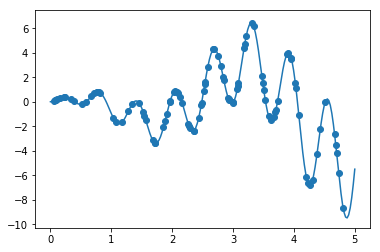

Most fitted DNA:  [1 0 1 0 1 0 0 1 0 1]


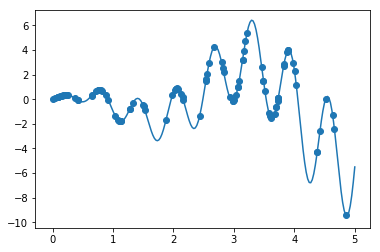

Most fitted DNA:  [1 0 1 0 0 1 0 0 1 0]


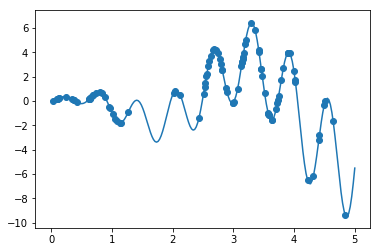

Most fitted DNA:  [1 0 1 0 1 0 0 0 0 0]


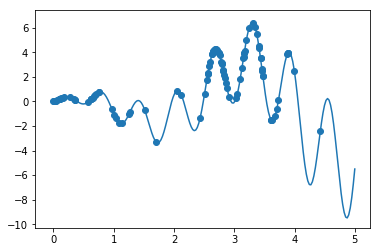

Most fitted DNA:  [1 0 1 0 1 0 0 1 1 1]


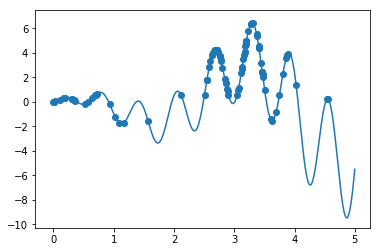

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 0]


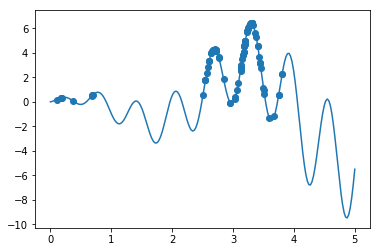

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 0]


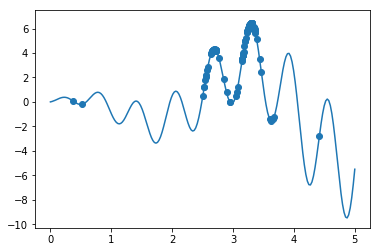

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


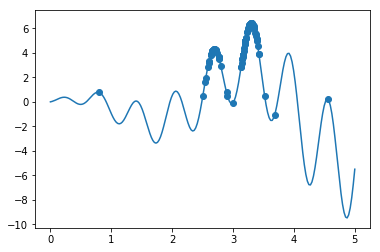

Most fitted DNA:  [1 0 1 0 1 0 0 1 0 0]


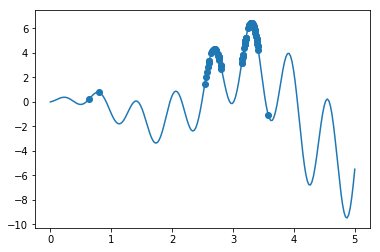

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 0]


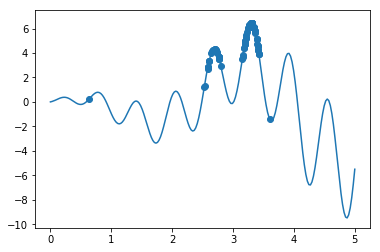

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


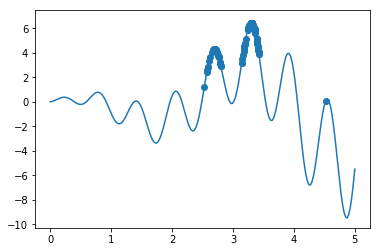

Most fitted DNA:  [1 0 1 0 1 0 0 1 0 0]


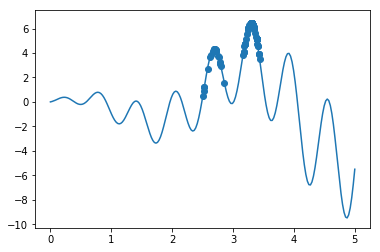

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


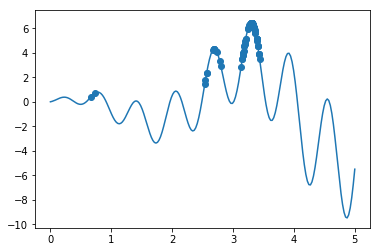

Most fitted DNA:  [1 0 1 0 1 0 0 0 0 1]


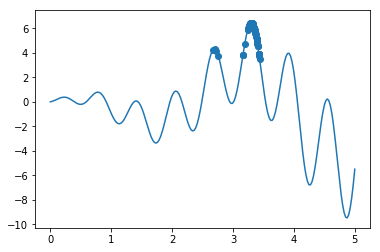

Most fitted DNA:  [1 0 1 0 1 0 0 0 0 1]


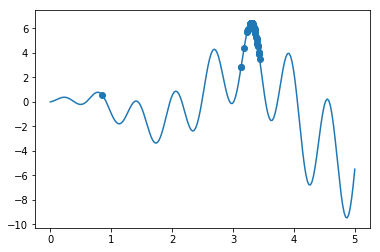

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 0]


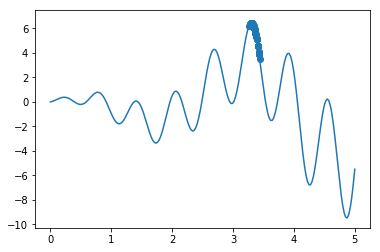

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 0]


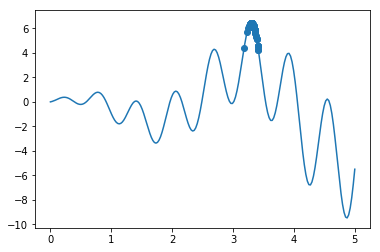

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 0]


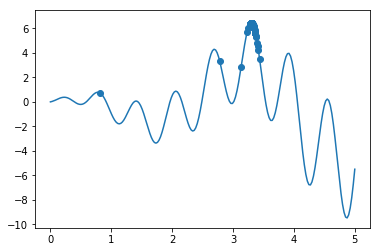

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 0]


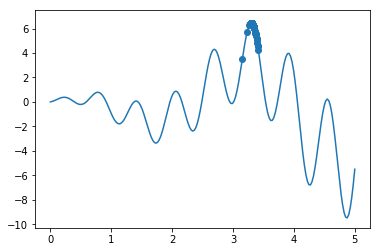

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


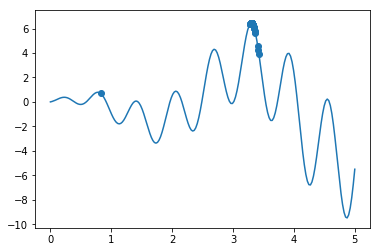

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


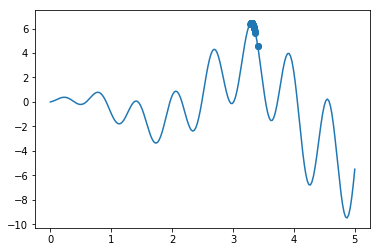

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


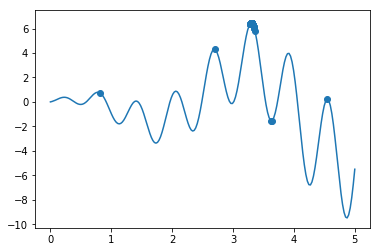

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


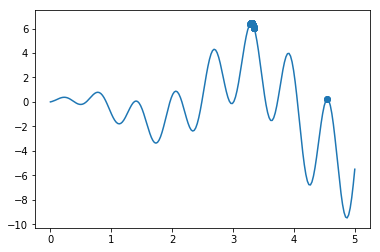

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


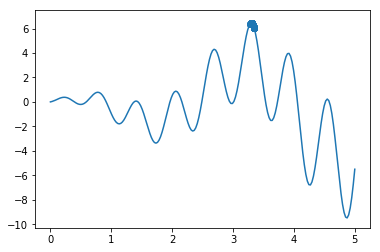

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


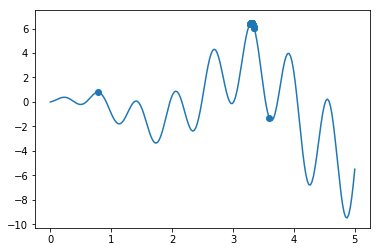

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


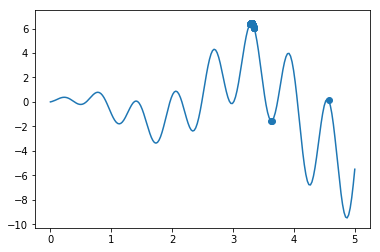

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


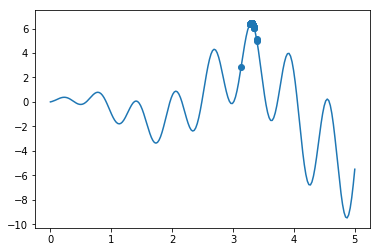

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


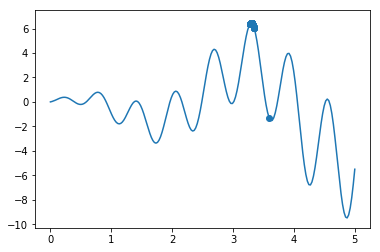

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


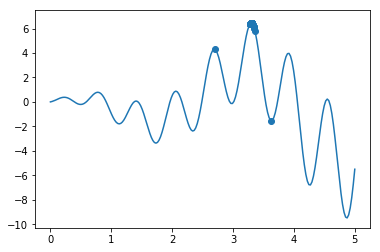

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


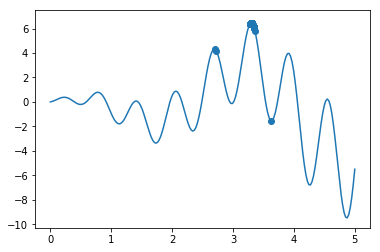

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


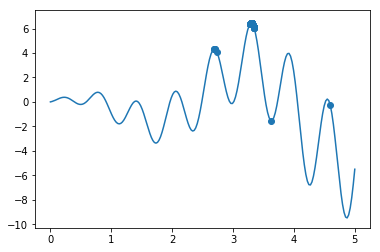

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


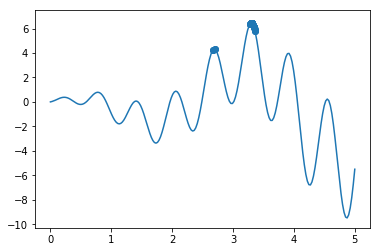

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


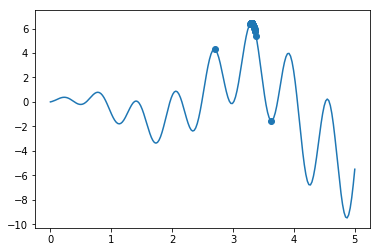

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


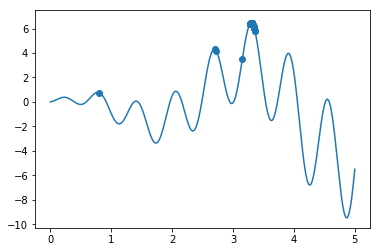

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


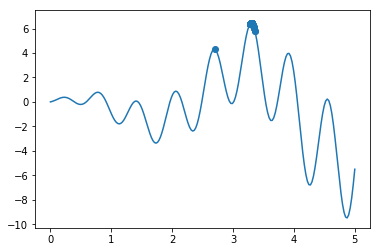

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


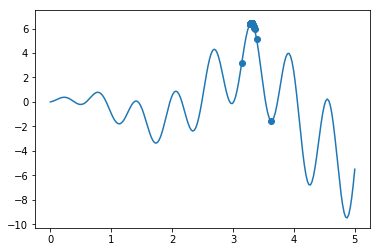

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


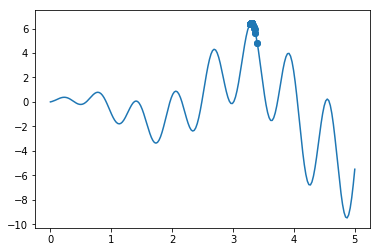

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


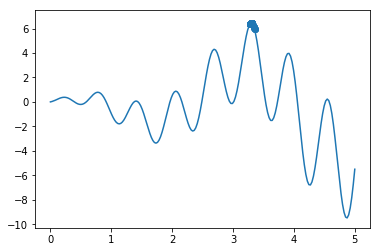

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


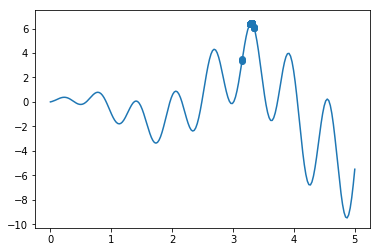

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


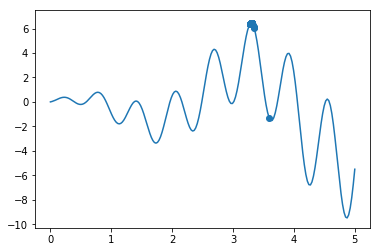

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


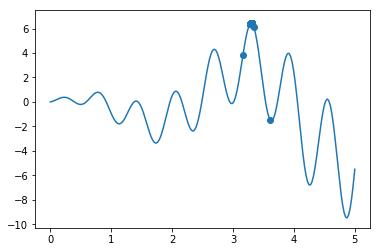

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


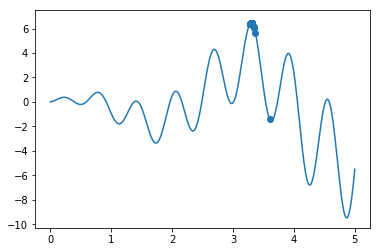

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


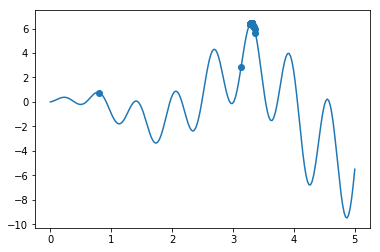

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


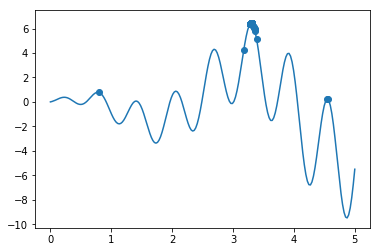

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


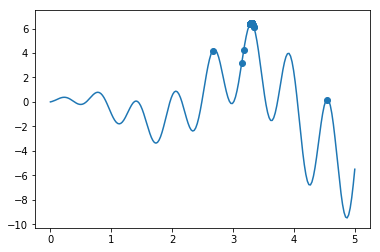

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


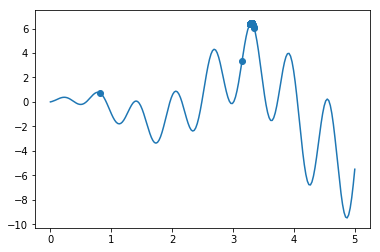

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


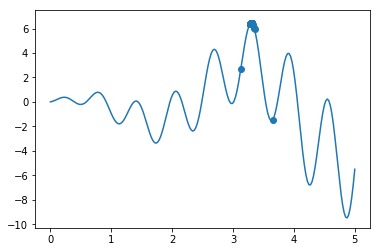

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


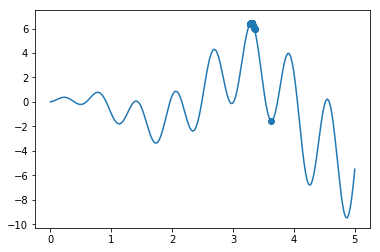

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


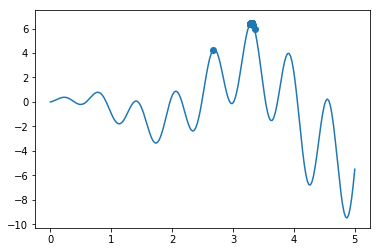

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


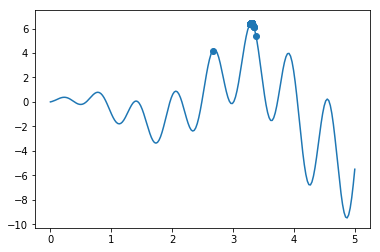

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


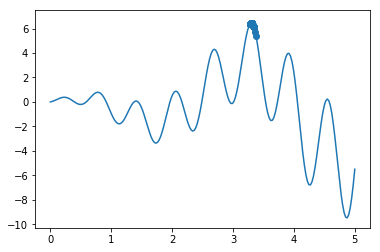

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


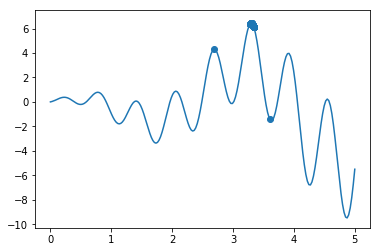

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


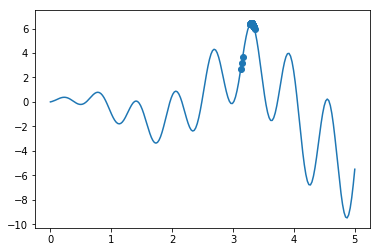

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


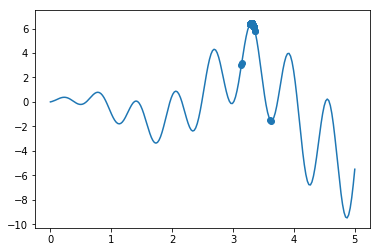

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


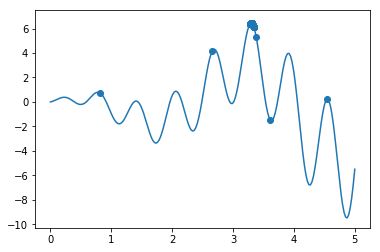

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


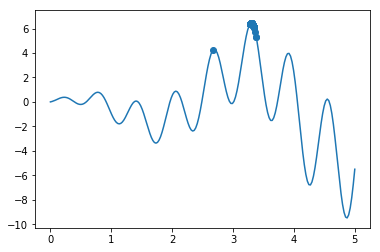

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


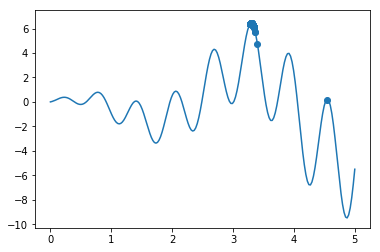

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


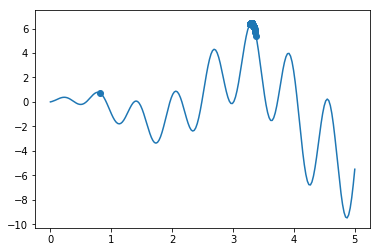

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


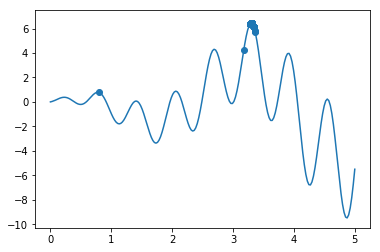

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


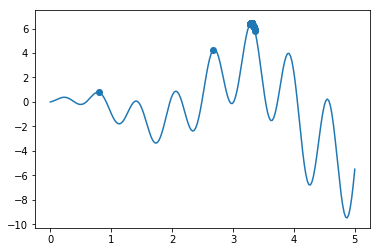

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


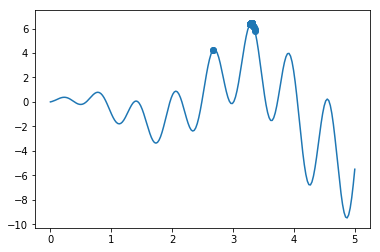

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


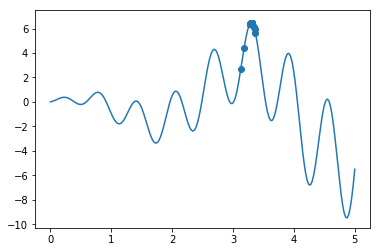

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


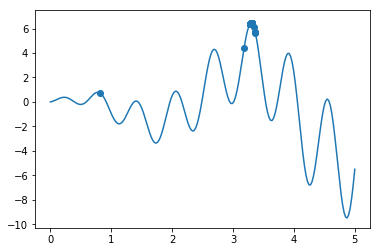

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


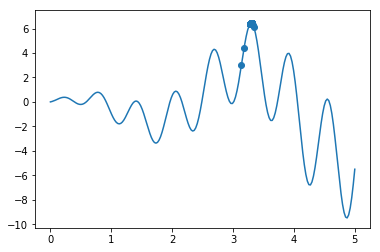

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


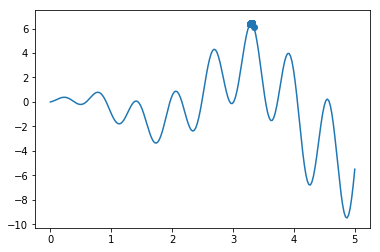

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


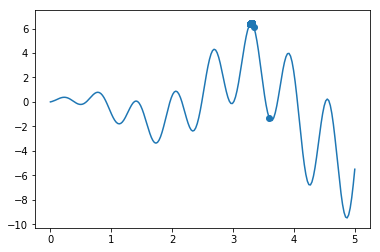

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


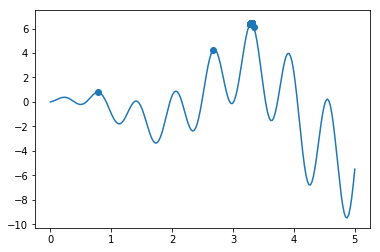

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


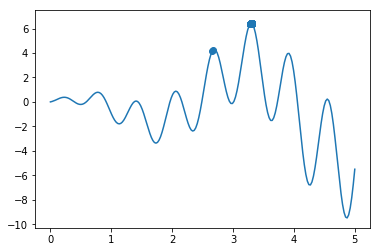

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


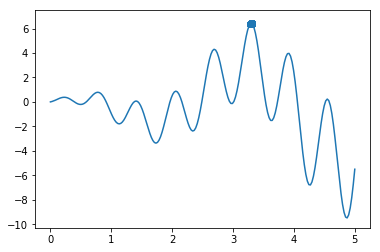

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


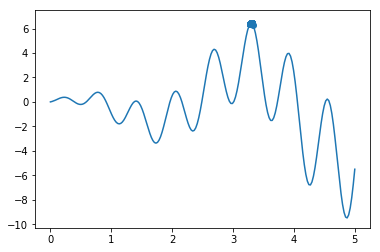

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


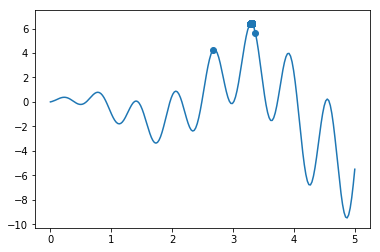

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


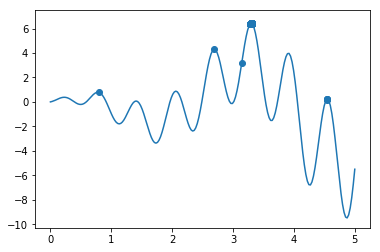

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


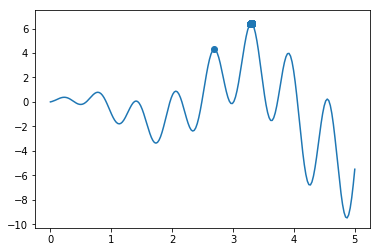

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


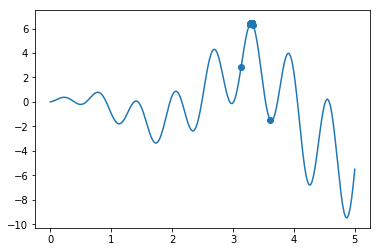

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


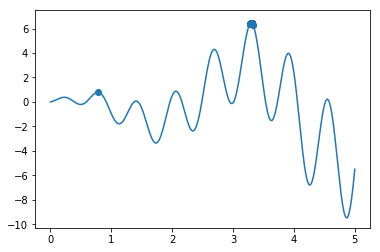

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


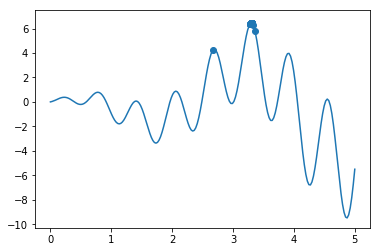

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


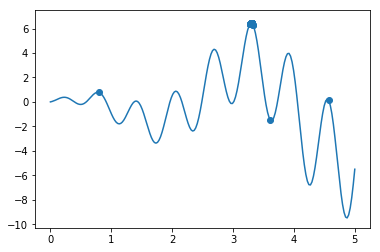

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


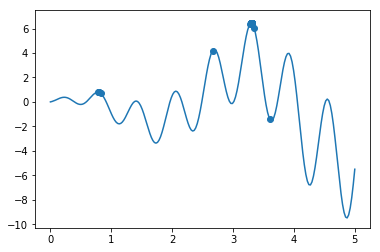

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


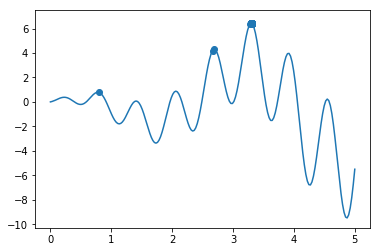

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


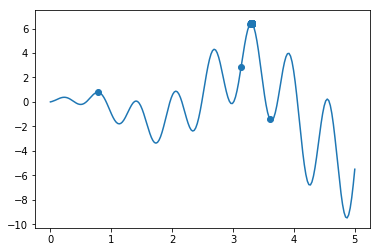

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


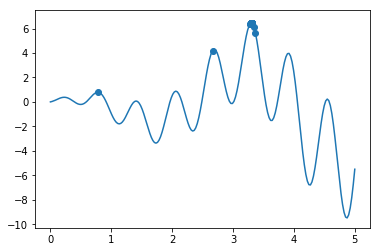

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


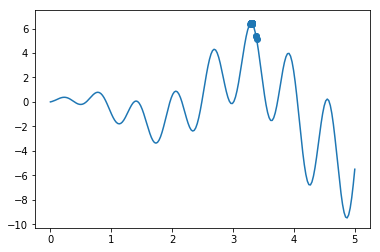

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


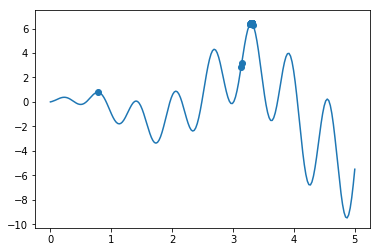

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


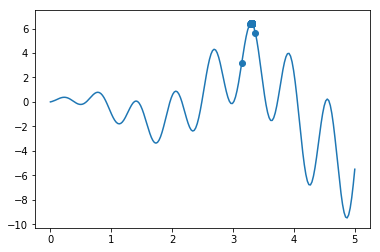

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


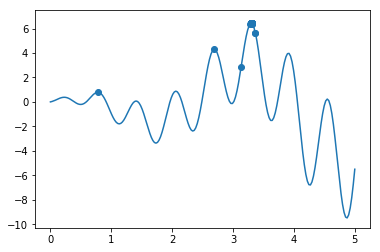

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


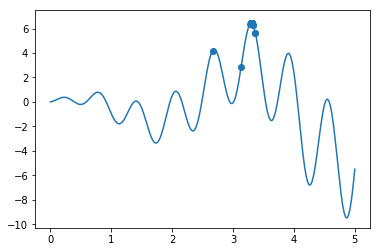

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


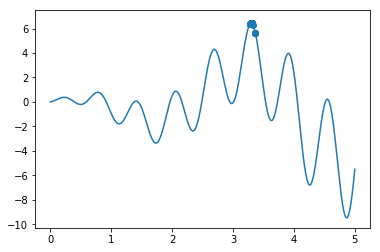

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


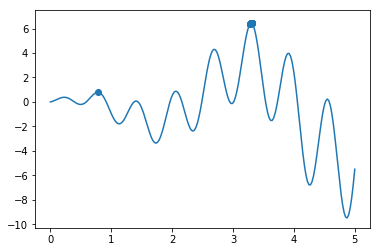

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


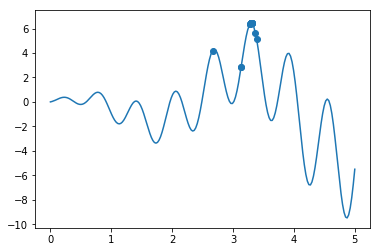

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


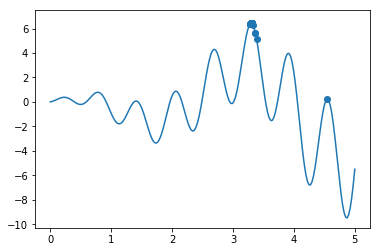

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


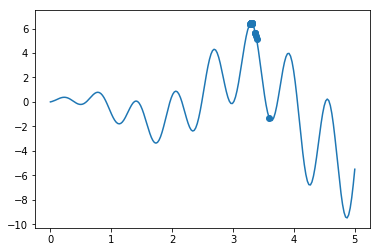

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


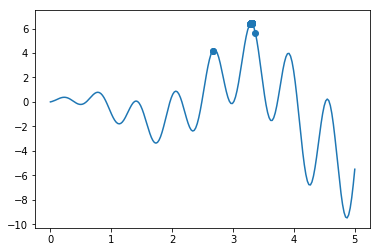

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


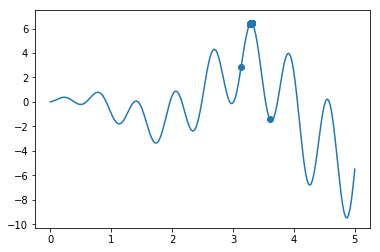

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


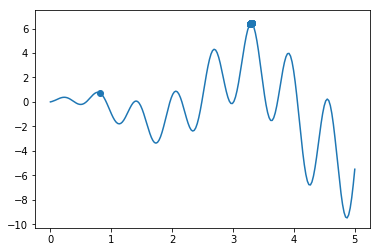

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


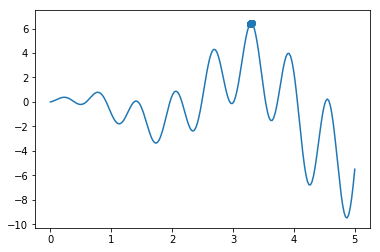

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


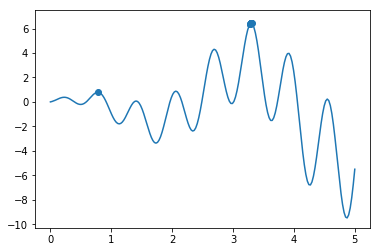

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


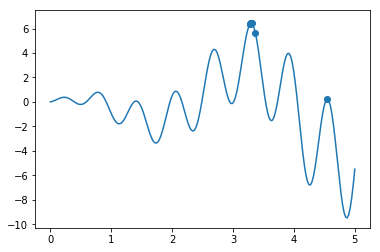

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


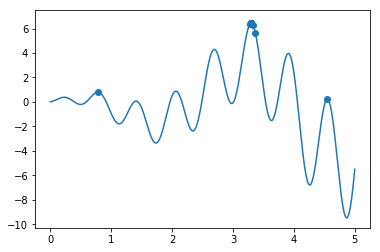

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


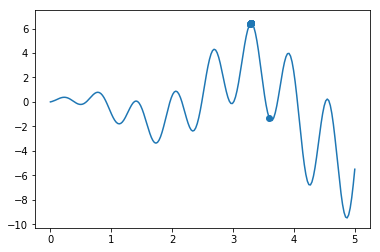

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


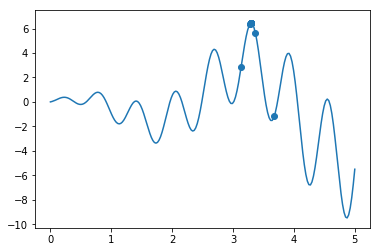

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


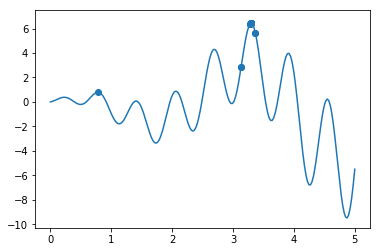

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


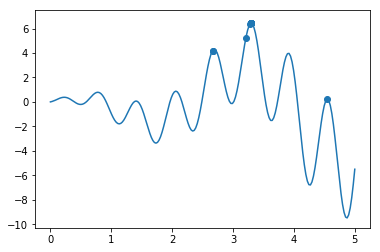

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


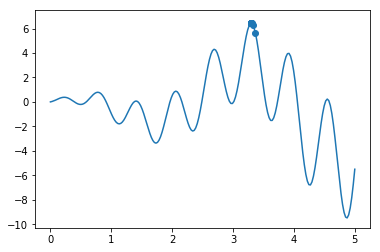

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


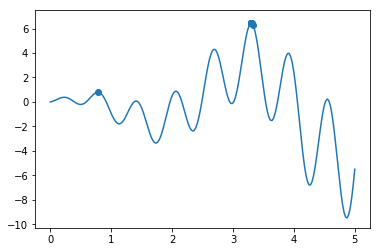

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


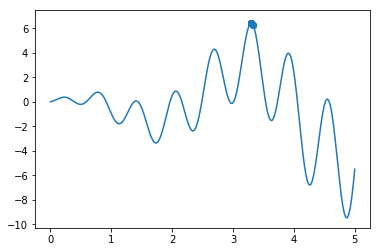

Most fitted DNA:  [1 0 1 0 1 0 0 0 0 1]


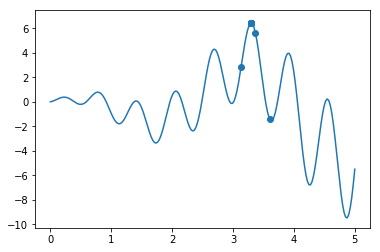

Most fitted DNA:  [1 0 1 0 1 0 0 0 0 1]


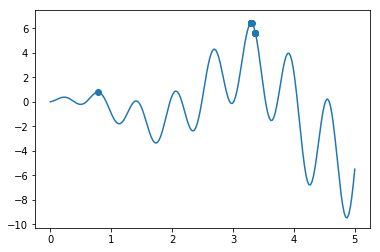

Most fitted DNA:  [1 0 1 0 1 0 0 0 0 1]


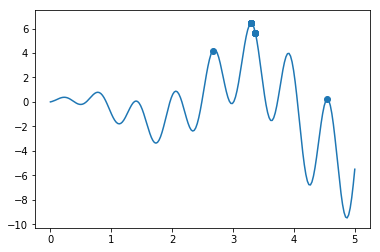

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


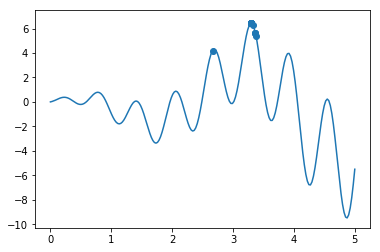

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


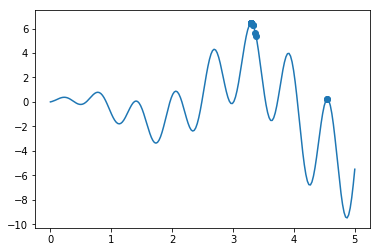

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


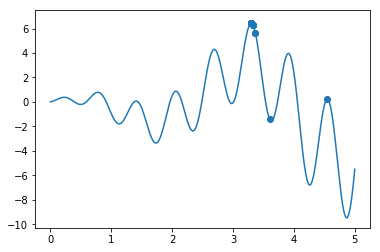

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


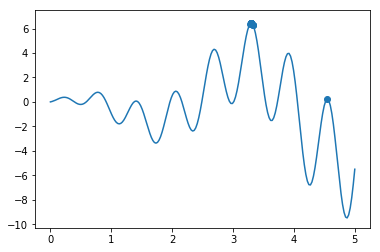

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


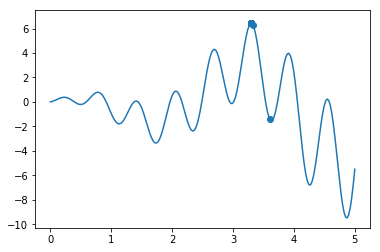

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


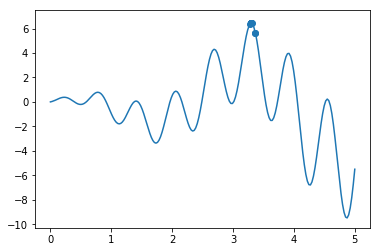

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


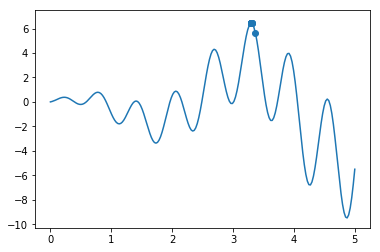

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


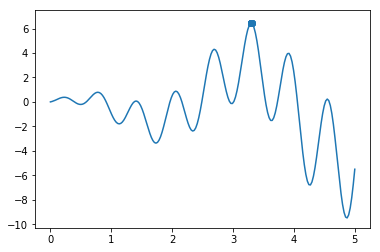

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


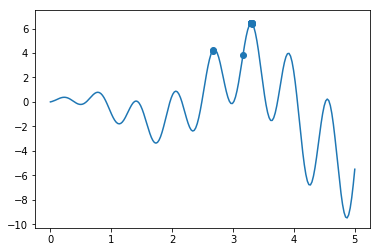

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


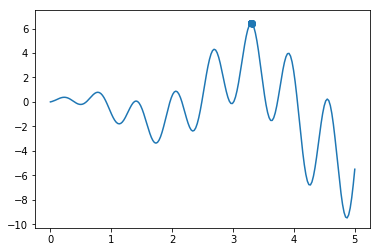

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


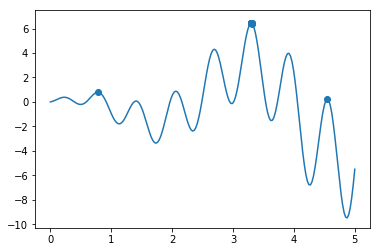

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


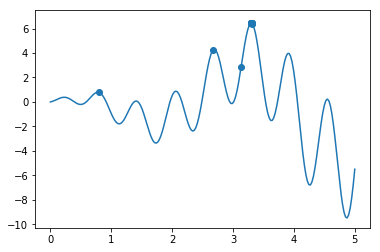

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


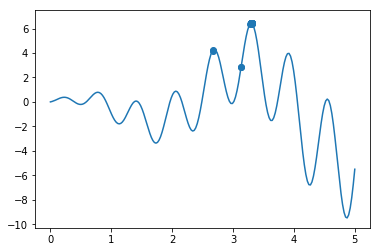

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


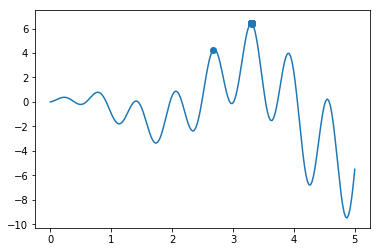

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


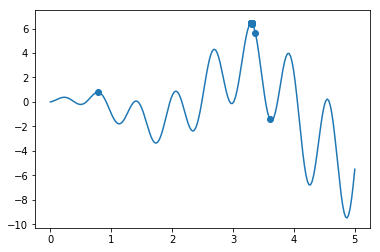

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


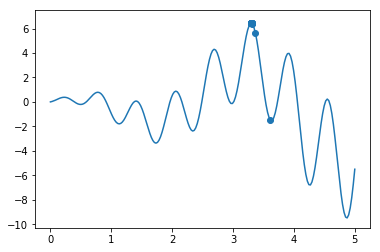

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


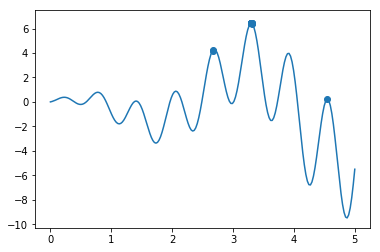

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


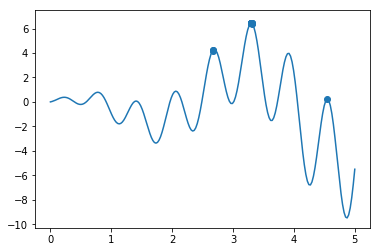

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


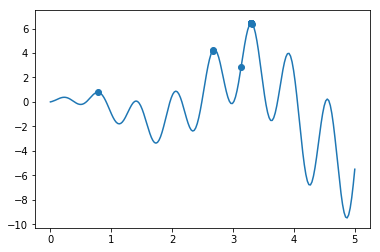

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


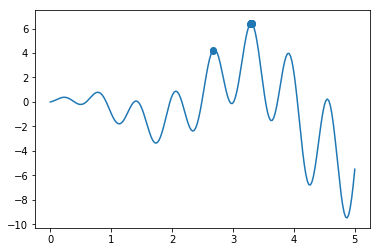

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


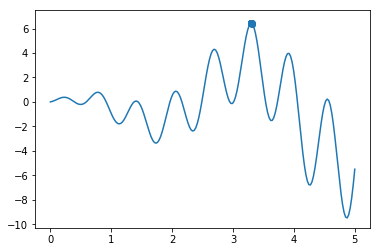

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


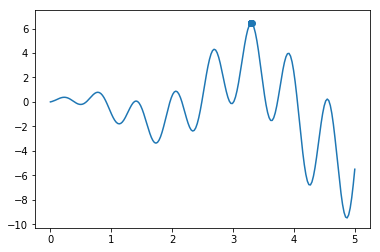

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


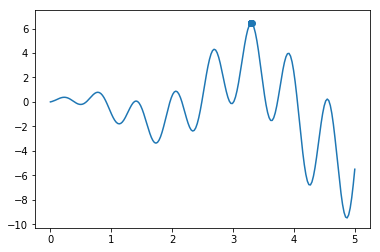

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


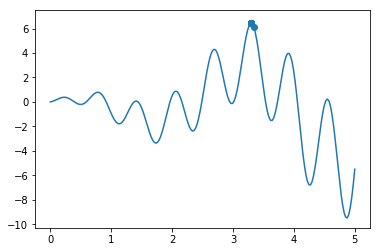

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


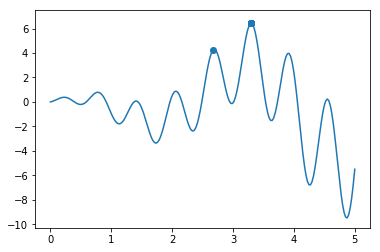

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


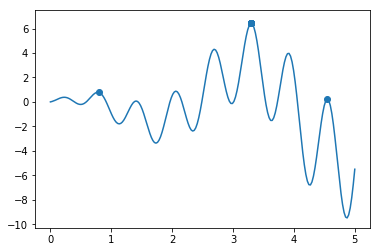

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


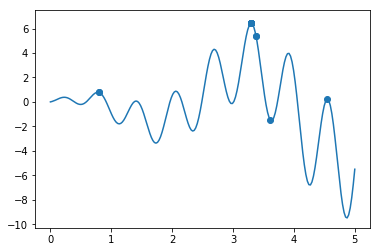

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


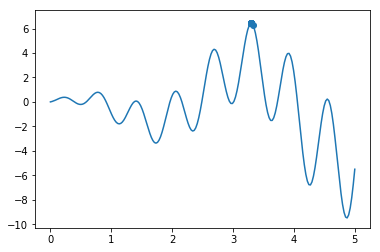

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


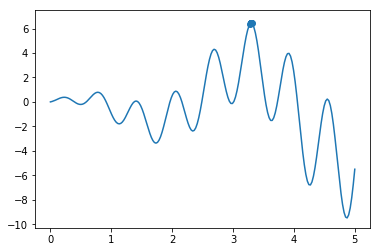

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


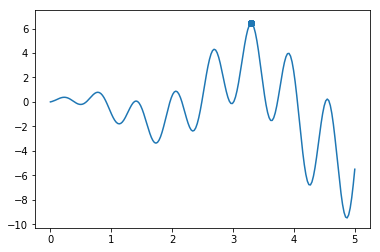

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


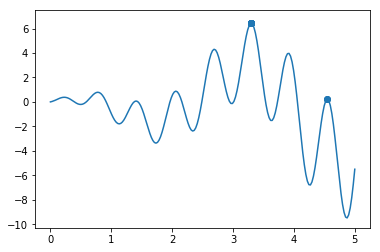

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


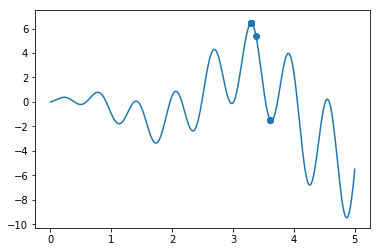

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


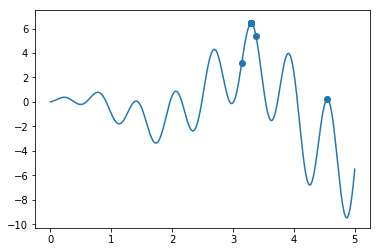

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


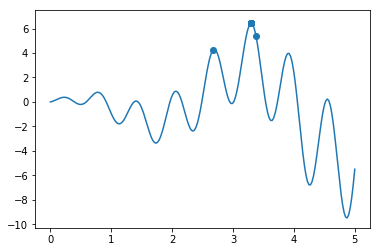

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


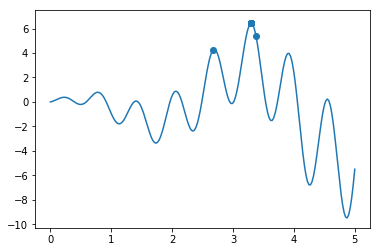

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


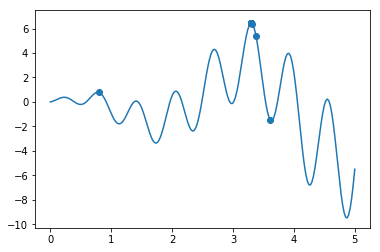

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


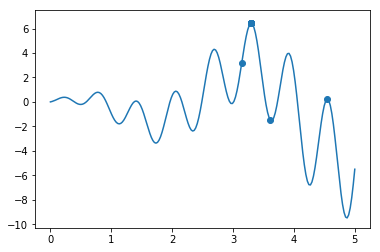

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


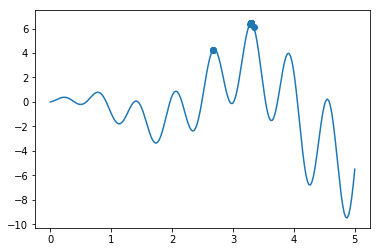

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


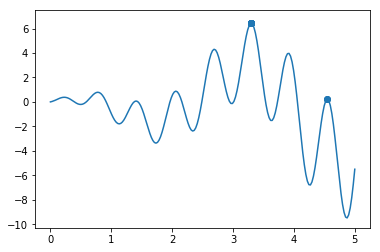

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


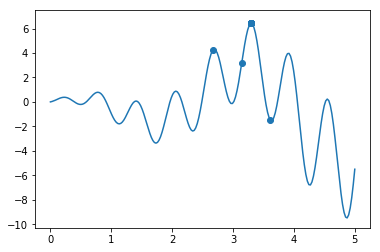

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


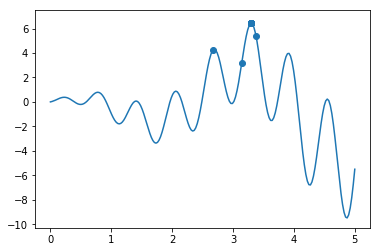

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


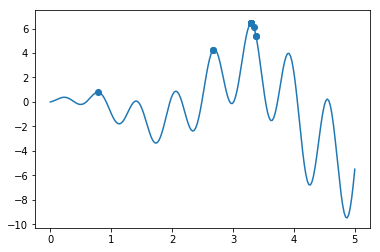

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


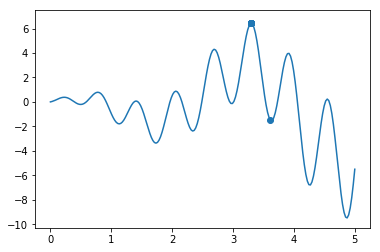

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


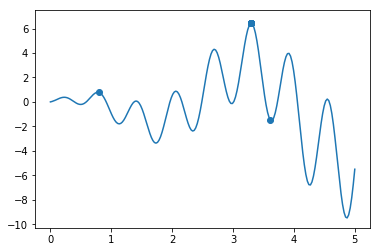

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


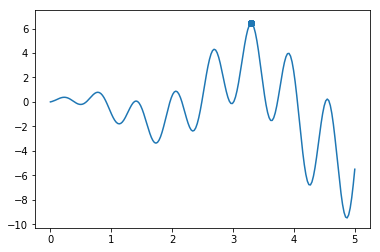

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


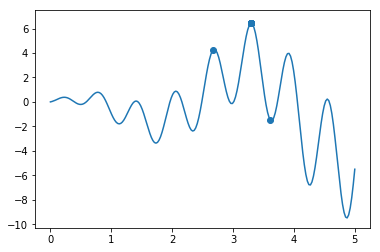

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


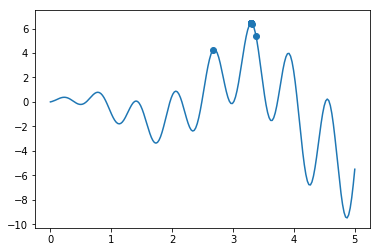

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


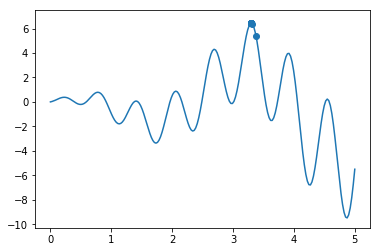

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


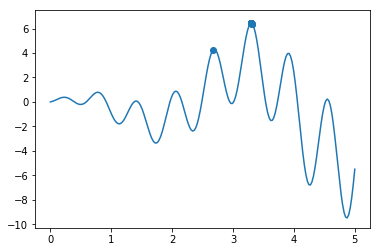

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


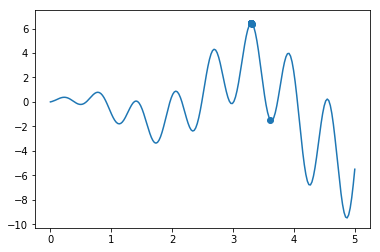

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


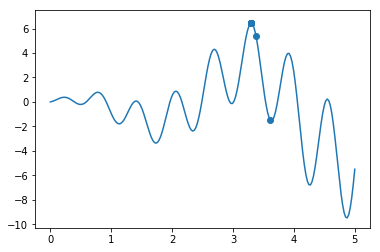

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


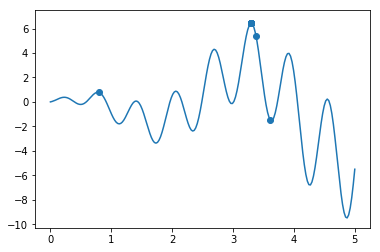

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


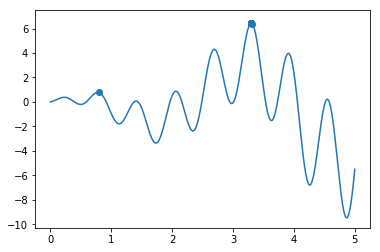

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


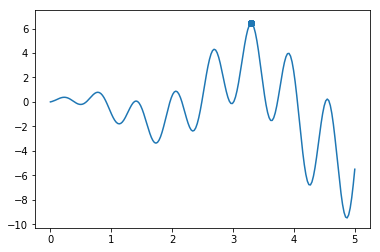

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


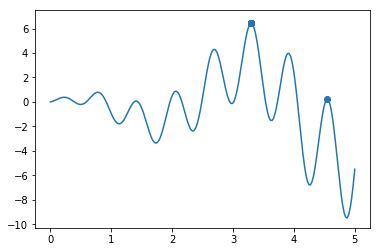

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


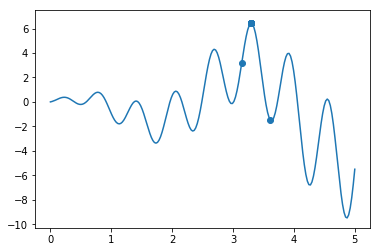

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


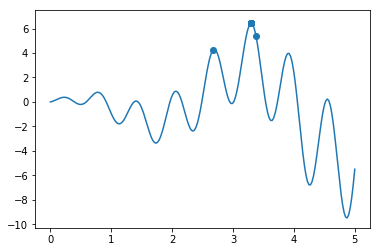

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


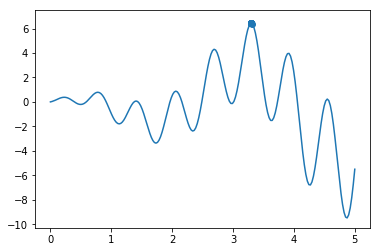

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


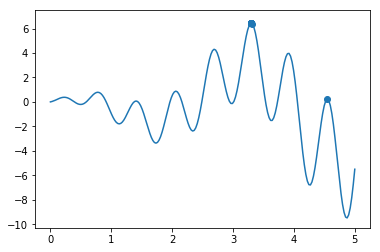

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


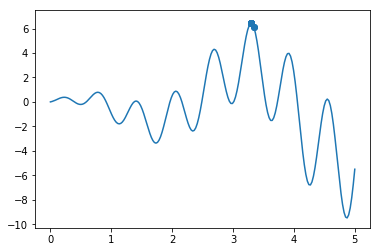

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


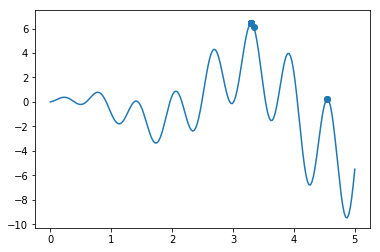

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


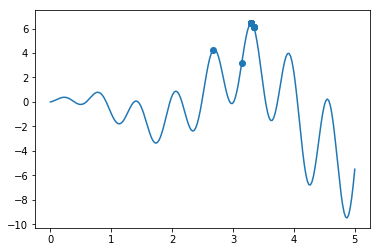

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


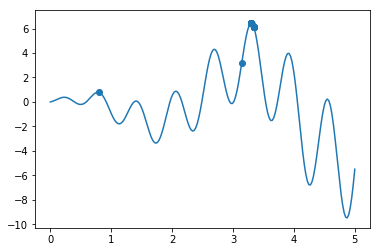

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


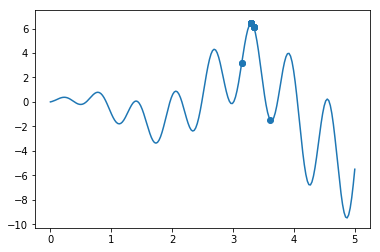

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


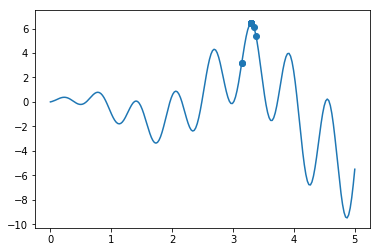

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


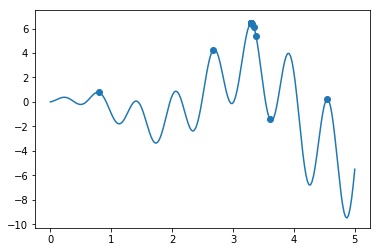

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


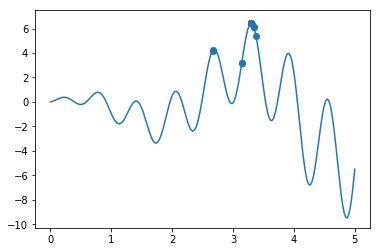

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


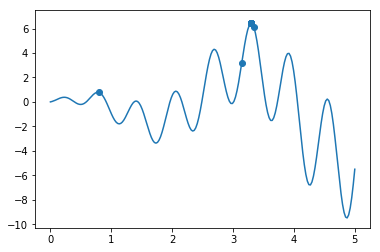

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


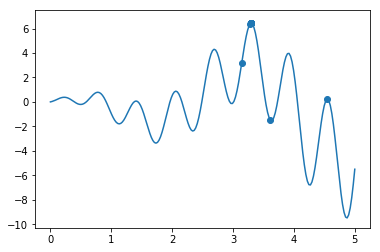

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


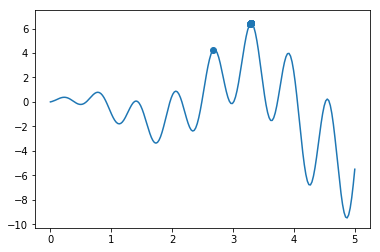

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


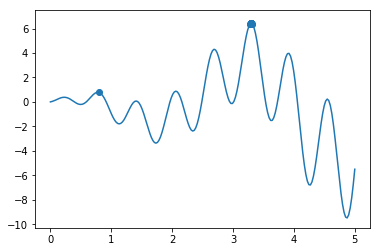

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


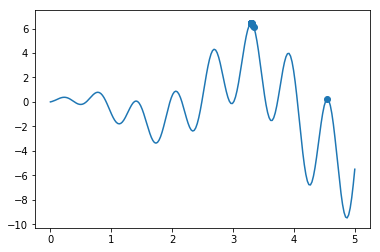

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


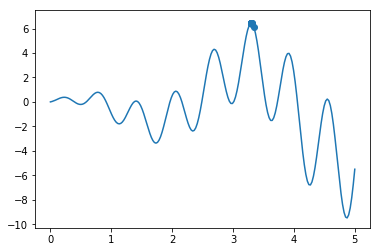

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


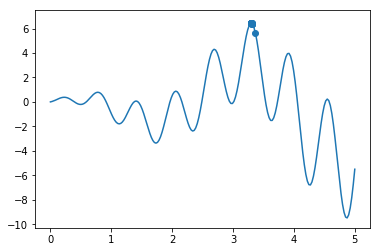

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


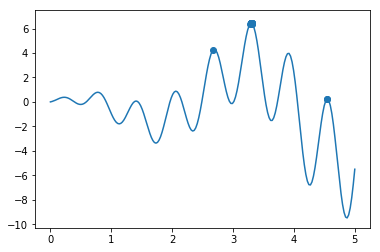

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


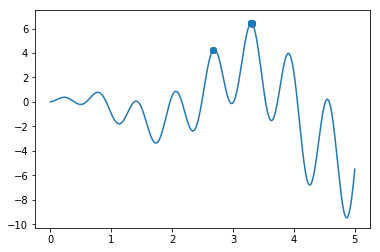

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


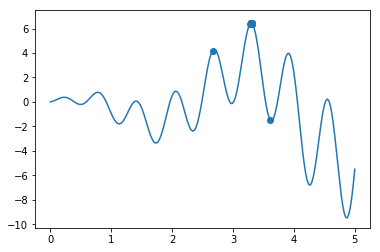

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


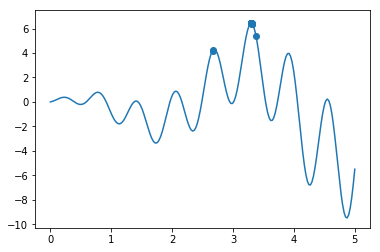

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


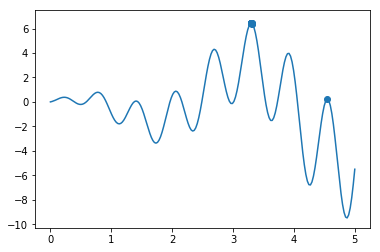

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


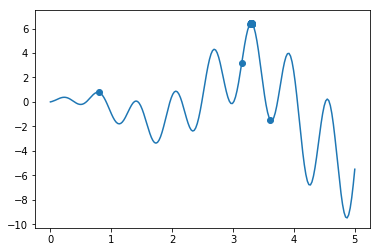

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


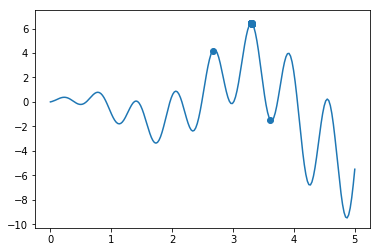

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


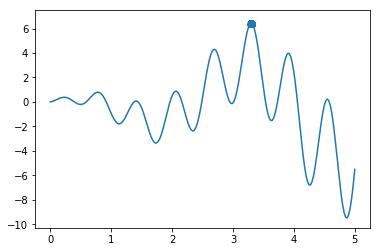

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


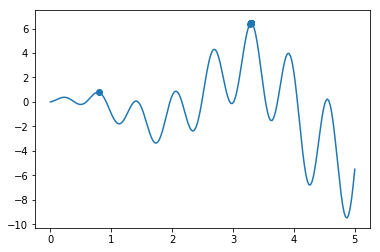

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


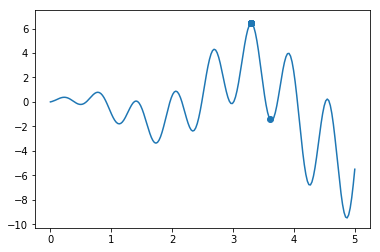

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


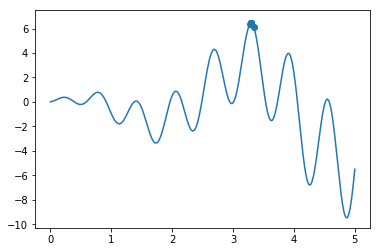

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


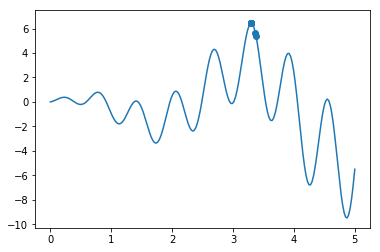

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


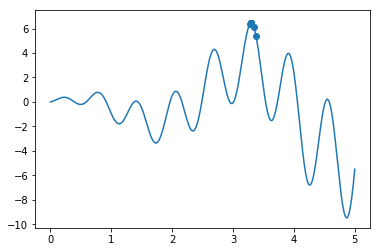

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


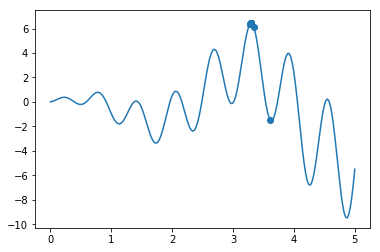

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


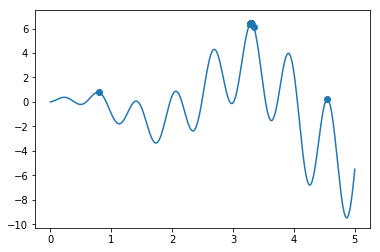

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


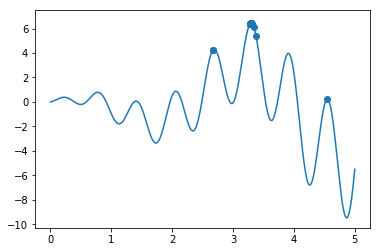

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


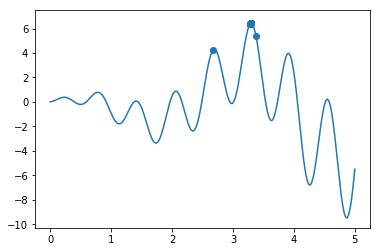

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


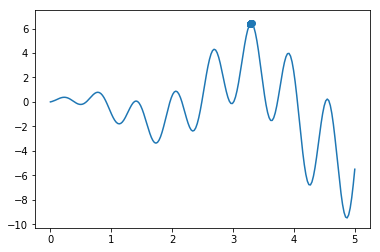

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


In [8]:
iterations = 200

for _iter in range(iterations):
    F_values = F(translateDNA(pop))
    plt.plot(x, F(x))
    plt.scatter(translateDNA(pop), F_values)
    plt.show()
    
    fitness = get_fitness(F_values)
    print("Most fitted DNA: ", pop[np.argmax(fitness), :])
    pop = select(pop, fitness)
    pop_copy = pop.copy()
    for parent in pop:
        child = crossover(parent, pop_copy)
        child = mutate(child)
        parent[:] = child 

    